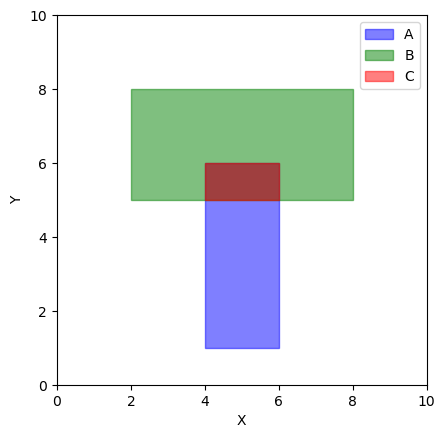

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the coordinates for polygons A and B
polygon_A_coords = [(4, 1), (6, 1), (6, 6), (4, 6)]
polygon_B_coords = [(2, 5), (8, 5), (8, 8), (2, 8)]

# Helper function to get edges from coordinates
def get_edges(coords):
    edges = []
    for i in range(len(coords)):
        edges.append((coords[i], coords[(i + 1) % len(coords)]))
    return edges

# Helper function to check if a point is inside an edge
def is_inside(p, edge):
    a, b = edge
    return (b[0] - a[0]) * (p[1] - a[1]) > (b[1] - a[1]) * (p[0] - a[0])

# Helper function to compute intersection of two lines
def compute_intersection(a, b, c, d):
    A1 = b[1] - a[1]
    B1 = a[0] - b[0]
    C1 = A1 * a[0] + B1 * a[1]
    A2 = d[1] - c[1]
    B2 = c[0] - d[0]
    C2 = A2 * c[0] + B2 * c[1]
    delta = A1 * B2 - A2 * B1
    if delta == 0:
        raise ValueError("Lines do not intersect")
    x = (B2 * C1 - B1 * C2) / delta
    y = (A1 * C2 - A2 * C1) / delta
    return (x, y)

# Sutherland-Hodgman algorithm to find intersection of two polygons
def sutherland_hodgman(subject_polygon, clip_polygon):
    output_list = subject_polygon
    for edge in get_edges(clip_polygon):
        input_list = output_list
        output_list = []
        s = input_list[-1]
        for e in input_list:
            if is_inside(e, edge):
                if not is_inside(s, edge):
                    output_list.append(compute_intersection(s, e, edge[0], edge[1]))
                output_list.append(e)
            elif is_inside(s, edge):
                output_list.append(compute_intersection(s, e, edge[0], edge[1]))
            s = e
    return output_list

# Calculate the intersection of polygons A and B
intersection_coords = sutherland_hodgman(polygon_A_coords, polygon_B_coords)

# Visualize the polygons and their intersection
fig, ax = plt.subplots()

# Add polygons A and B
patch_A = patches.Polygon(polygon_A_coords, closed=True, fill=True, color='blue', alpha=0.5, label='A')
patch_B = patches.Polygon(polygon_B_coords, closed=True, fill=True, color='green', alpha=0.5, label='B')
ax.add_patch(patch_A)
ax.add_patch(patch_B)

# Add the intersection polygon
if intersection_coords:
    patch_intersection = patches.Polygon(intersection_coords, closed=True, fill=True, color='red', alpha=0.5, label='C')
    ax.add_patch(patch_intersection)

# Set plot limits and labels
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_aspect('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show plot
plt.show()
